<a href="https://colab.research.google.com/github/Marius244/PPPO/blob/main/Projekatt_pppo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student**: Marius Štefan IT77/2021

**Tema**: Ultrazvuk segmentacija

#**Uvod**

**Segmentacija** slike predstavlja podelu slike u smislene strukture tj. segmente i često je suštinski korak u analizi slike, predstavljanju objekta, vizuelizaciji, kao i mnogim drugim zadacima tokom računarske obrade fotografije.
**Cilj** segmentacije je da se pojednostavi i promeni prikaz slike u nešto što bi bilo smislenije i lakše za analizu. Tehnike za segmentaciju **lociraju objekte** koji se sastoje od piksela koji imaju nešto zajedničko. Najčešće to znači da su pikseli sa gotovo istim intenzitetom vrednosti grupisani zajedno, ili pikseli sa bojom istog koda.


Segmentacija je jedan od **najkritičnijih** zadataka u automatskoj analizi slike, jer će rezultati segmentacije uticati na sve naredne procese analize slike, kao što su reprezentacija i opis objekta, merenje odlika pa čak i zadataka višeg nivoa, kao što su klasifikacija objekta i interpretacija scene.

 Segmentacija fotografije svoju **primenu** pronalazi u mnogim oblastima: medicinska analiza fotografije, detekcija objekata (otkrivanje saobraćajnih znakova), obrada satelitskih snimaka, video nadzor, kontrola saobraćaja, kao i u ogromnom broju drugih oblasti.

**METODE SEGMENTACIJE**

Kada govorimo o tehnikama koje se primenjuju pri segmentaciji slika možemo izdvojiti dve najčešće i to su **tehnika izdvajanja regiona - semantička segmentacija**  i **tehnika pronalaženja ivica - segmentacija instance**  

Kod semantičke segmentacije svaki piksel pripada određenoj klasi (ili pozadini ili osobi), takođe svi pikseli koji pripradaju određenoj klasi su predstavljeni istom bojm.

Kod segmentacije instance takođe svaki piksel slike pripada određenoj klasi, međutim različiti objekti iste klase imaju različite boje.

U okviru projekta korišćena je **U-Net** kovoluciona neuronska mreža koja obezbeđuje brzu i preciznu semantičku segmentaciju slika.
Njena arhitektura može se posmatrati kao mreža enkodera koju prati mreža dekodera. Za razliku od klasifikacije gde je krajnji rezultat mreže jedina važna stvar, semantička segmentacija ne zahteva samo diskriminaciju na nivou piksela već i mehanizam za projektovanje diskriminativnih karakteristika naučenih u različitim fazama enkodera na prostor piksela.


Pored svoje efikasnosti, U-Net takođe ima prednost dostupnosti implementacija u popularnim bibliotekama za duboko učenje poput **TensorFlow-a i PyTorch-a**. To olakšava implementaciju, eksperimentisanje i prilagođavanje U-Net arhitekture specifičnim zahtevima i skupovima podataka.

U suštini, izbor U-Net arhitekture za segmentaciju u medicinskim slikama motivisan je njegovom sposobnošću da postigne visoku tačnost i preciznost u segmentaciji, kao i njegovom popularnošću u istraživačkoj zajednici. U budućnosti, nastavak istraživanja i razvoj novih metoda će dodatno unaprediti segmentaciju i omogućiti primenu u različitim situacijama.

**SET PODATAKA**

Zadatak je da se na ultrazvučnim slikama segmentira skup nerava. Za ove potrebe je dobijen veliki broj slika za obuku na kojima su ljudi zabeležili identifikovane nerve.

U dobijenom dataset-u imamo sledeće:
1.   **train foldera** koji sadrži slike koje se koriste za treniranje modela. Svaka slika sa istim brojem predmeta dolazi od iste osobe. Ova mapa takođe uključuje slike maski koje prikazuju segmentaciju. Drugim rečima, za svaku sliku pojedine osobe postoji odgovarajuća maska koja ukazuje na prisustvo identifikovanih nerava ili njihovo odsustvo.
2.   **test foldera** koji sadrži slike za testiranje modela. Cilj je predvideti segmentaciju za ove slike i na njima nije dat broj osobe na koju se odnose, kako model sam treba da vrši procenu. Nema preklapanja između slika koje se nalaze u trening i test setovima podataka.
3. **train_masks.csv** koji daje maske slika treninga u kodiranom formatu. Tačnije, naznačeno je koji pikseli slike obuhvataju nerv na konkretnoj slici. To je pogodnost da se pokaže kako se maske slika mogu pretvoriti u kodirane vrednosti teksta za slanje.

In [ ]:
#Instalacija biblioteke PyTorch koja sadrži potrebne modele
!pip install segmentation-models-pytorch
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.8 MB/s eta 0:00:00
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-bosuyk2t
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-bosuyk2t
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit e76ed01d49ff986be065fcc3c764255ce512cf16
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for segmentation_models_pytorch: filename=segmentation_models_pytorch-0.5.1.dev0-py3-none-any.whl size=154979 sha256=11c59bf73328d0de76c46ff6da2948197b88b91889e1209727553de3ebb577d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-30e5lc83/wheels/24/b5/5c/fec80fd

In [ ]:
! pip install albumentations  #ovaj paket ce nam omoguciti kasniju augmentaciju podataka
! pip install -U git+https://github.com/albu/albumentations --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.4/369.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 21.4 MB/s eta 0:00:00
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-_3at65s8
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-_3at65s8
  Resolved https://github.com/albu/albumentations to commit 66212d77a44927a29d6a0e81621d3c27afbd929c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  At

U narednom bloku izvršiće se importovanje potrebnih modula koji će se koristiti za dalju obuku i razvoj modela

In [ ]:
import os
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import cv2
from tqdm.notebook import tqdm
from glob import glob
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split, KFold

import shutil

import torch
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import albumentations
import torchvision
from torchvision import transforms, models

import random

import segmentation_models_pytorch as smp
from PIL import Image

Potrebno je da definišemo gde se nalaze podaci i postave putanje

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train = '/content/drive/MyDrive/Ultrasound_segmentation/train'
test = '/content/drive/MyDrive/Ultrasound_segmentation/test'
train_csv = '/content/drive/MyDrive/Ultrasound_segmentation/train_masks.csv'

Mounted at /content/drive


Pregled train_mask.csv fajla i prikaz prvih 5 linija koda

In [ ]:
train_mask = pd.read_csv(train_csv)

In [ ]:
#prikaz prvih 5 linija
train_mask.head(5)

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [ ]:
train_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


Pravimo jednostavan stubičasti dijagram (bar chart) da se prikaže grafički broj slika koje imaju i nemaju masku.

Text(0, 0.5, 'Count')

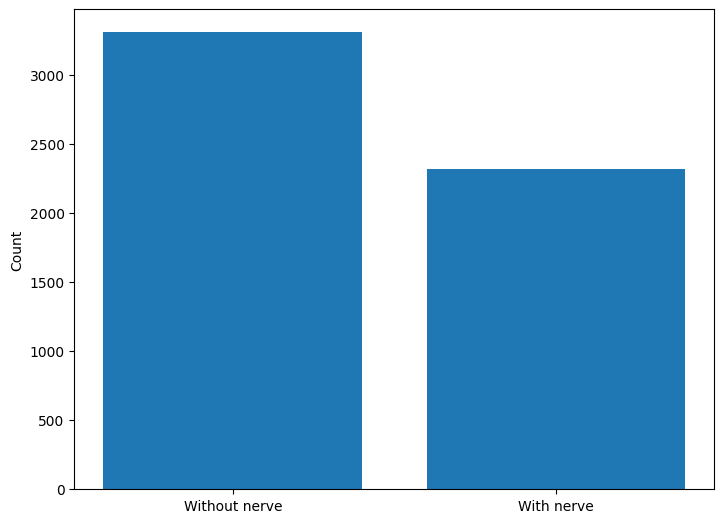

In [ ]:
with_nerve = (train_mask['pixels'][train_mask['pixels']!= 'NaN'].count()) # računa broj slika koje imaju masku
without_nerve = (train_mask['img'].count() - with_nerve) # računa broj slika koje nemaju masku

plot = plt.figure()
ax = plot.add_axes([0,0,1,1]) # dodaje koordinate osa u okviru figure
x = ['Without nerve', 'With nerve']
labels = [without_nerve, with_nerve]
ax.bar(x, labels) # crta stubičasti dijagram
ax.set_facecolor('WHITE')
plt.ylabel("Count")


Ovaj kod uzima nasumičnu sliku iz trening skupa i njenu pripadajuću masku

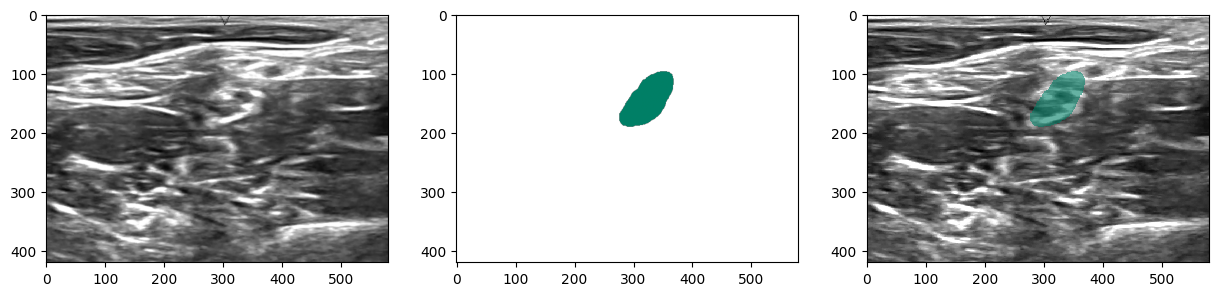

In [ ]:
import random

random_img_index = random.randint(1, 30) # bira nasumičan indeks slike između 1 i 30

# putanja
img_filename = f"{train}/{random_img_index}_1.tif"
mask_filename = f"{train}/{random_img_index}_1_mask.tif"

img = np.array(Image.open(img_filename)) # otvara sliku i pretvara je u numpy niz
img_mask = np.array(Image.open(mask_filename)) # otvara masku i pretvara je u numpy niz
img_mask = np.ma.masked_where(img_mask == 0, img_mask) # maskira piksele koji imaju vrednost 0 (oni se ne prikazuju)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(img, cmap="gray") # prikazuje originalnu sliku u sivim tonovima
ax[1].imshow(img_mask, cmap="summer") # prikazuje samo masku u zelenim nijansama
ax[2].imshow(img, cmap="gray", interpolation="none")
ax[2].imshow(img_mask, cmap="summer", interpolation="none", alpha=0.6) # preklapa masku preko slike sa 60% providnosti

plt.show()

Putanje ka maskama i originalnim slikama

In [ ]:
masks = [os.path.join(train,i) for i in os.listdir(train) if "mask" in i]
imgs = [i.replace("_mask","") for i in masks]

In [ ]:
data_df = pd.DataFrame({"image":imgs,"mask":masks}) # pravi DataFrame koji povezuje slike (imgs) i njihove maske (masks)

#Podela novoformatiranih podataka na validacione i testne(20% ukupnog seta):
train_df, validation_df = train_test_split(data_df,test_size = 0.20)

#Prikaz podataka
print(train_df.values.shape)
print(validation_df.values.shape)

(4508, 2)
(1127, 2)


In [ ]:
#prikaz prvih 5 linija
train_df.head()

,image,mask
2574,/content/drive/MyDrive/Ultrasound_segmentation...,/content/drive/MyDrive/Ultrasound_segmentation...
5013,/content/drive/MyDrive/Ultrasound_segmentation...,/content/drive/MyDrive/Ultrasound_segmentation...
5445,/content/drive/MyDrive/Ultrasound_segmentation...,/content/drive/MyDrive/Ultrasound_segmentation...
2080,/content/drive/MyDrive/Ultrasound_segmentation...,/content/drive/MyDrive/Ultrasound_segmentation...
4467,/content/drive/MyDrive/Ultrasound_segmentation...,/content/drive/MyDrive/Ultrasound_segmentation...


Nasumično biranje četiri slike i prikaz zajedno sa njihovim maskama u mreži od 2 reda i 4 kolone.
Prvi red prikazuje originalne slike, a drugi red odgovarajuće maske. Tako se lako vizuelno proverava kako maske stoje u odnosu na slike.

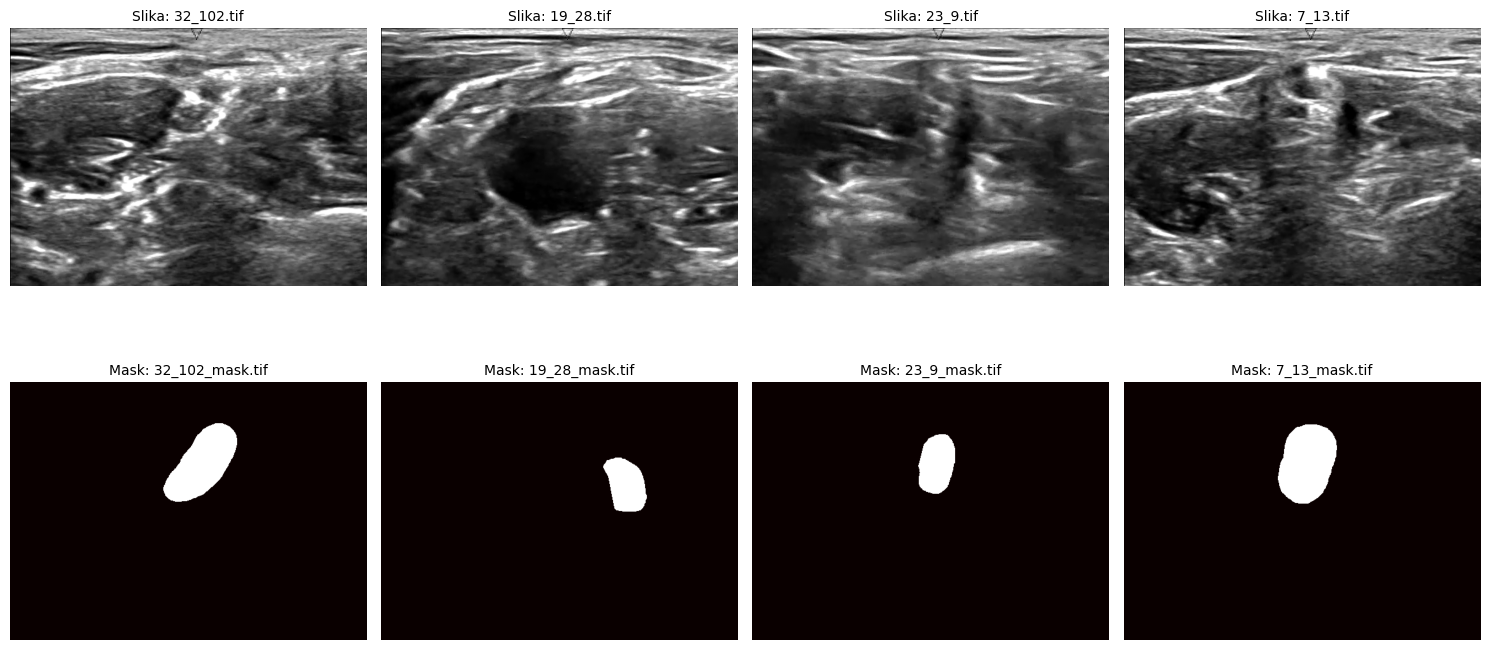

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

# Broj redova i kolona za mrežu slika
rows, cols = 2, 4

# Kreiranje figure
fig = plt.figure(figsize=(15, 8))

# Nasumično odabiranje 4 indeksa
random_indices = random.sample(range(len(data_df)), 4)

images_paths = data_df.iloc[random_indices]['image'] # dobavlja putanje do nasumično izabranih slika
masks_paths = data_df.iloc[random_indices]['mask'] # dobavlja putanje do njihovih maski

# Prikaz originalnih slika u prvom redu
for i, img_path in enumerate(images_paths, 1):
    ax = fig.add_subplot(rows, cols, i) # dodaje subplot na odgovarajuću poziciju
    img = np.array(Image.open(img_path)) # otvara sliku i pretvara u numpy niz
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Slika: {os.path.basename(img_path)}", fontsize=10)
    ax.axis('off')

# Prikaz maski u drugom redu
for i, (img_path, msk_path) in enumerate(zip(images_paths, masks_paths), 1):
    ax = fig.add_subplot(rows, cols, i + cols) # pozicija u drugom redu
    mask = np.array(Image.open(msk_path)) # otvara masku i pretvara u numpy niz
    ax.imshow(mask, cmap='hot')
    ax.set_title(f"Mask: {os.path.basename(msk_path)}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

#**Predprocesiranje**

Predprocesiranje je faza u kojoj pripremamo slike i maske za model, uključujući promenu dimenzija, normalizaciju i konverziju u tensore.
Ovde koristimo funkciju preprocessing iz Albumentations, koja kombinuje normalizaciju i prilagođavanje dimenzija očekivanim od modela. Takođe, augmentacija poput rotacije, flip-a i promena osvetljenja pomaže modelu da bolje generalizuje na novim i nepoznatim slikama

In [ ]:

def convert_to_tensor(x,**kwargs):
    return x.transpose(2,0,1).astype("float32")

#Generisanje kompozicije transformacija koristeći biblioteku Albumentations za obradu slika
def preprocessing(preprocessing_fn=None):
    transform = []
    if preprocessing_fn:
        transform.append(albumentations.Lambda(image=preprocessing_fn))
    transform.append(albumentations.Lambda(image=convert_to_tensor))
    return albumentations.Compose(transform) # kombinuje sve transformacije

#Funkcija koja izvršava augmentaciju menjanjem osvjetljenja, rotacijom, skaliranjem
def train_aug():
    transform =  [
                albumentations.Resize(height=224,width=224,interpolation=Image.BILINEAR), # resize slike
                albumentations.RandomBrightnessContrast(brightness_limit=0.10, contrast_limit=0), # random osvetljenje
                albumentations.ShiftScaleRotate(rotate_limit=15, shift_limit=0.20, scale_limit=0.2), # rotacija, shift, skaliranje
                albumentations.HorizontalFlip(), # horizontalno preslikavanje
            ]
    return albumentations.Compose(transform) # kombinuje sve transformacije

def validation_aug():
    transform = [
                albumentations.Resize(height=224,width=224,interpolation=Image.BILINEAR), # resize slike
            ]
    return albumentations.Compose(transform) # kombinuje sve transformacije



Ova klasa definiše prilagođeni PyTorch dataset za učenje modela segmentacije

In [ ]:
class GetDataset(Dataset):

    # inicijalizacija dataset-a
    def __init__(self,imagespath,maskspath,augment=None,preprocess=None):
        self.imagespath = imagespath # lista putanja do slika
        self.maskspath = maskspath # lista putanja do maski
        self.augment = augment # augmentacije (za trening)
        self.preprocess = preprocess

    # vraća broj uzoraka u datasetu
    def __len__(self):
        return len(self.imagespath)


    #izvlačenje pojedinačnih primera
    def __getitem__(self,idx):

        # učitavanje ikonvertovanje slike
        image = cv2.cvtColor(cv2.imread(self.imagespath[idx]),cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.maskspath[idx], cv2.IMREAD_GRAYSCALE)

        # primena augmentacije
        if self.augment:
            sample = self.augment(image=image, mask=mask)
            image,mask = sample['image'],sample['mask']
        # primena preprocesiranja
        if self.preprocess:
            sample = self.preprocess(image=image,mask=mask)
            image,mask = sample['image'],sample['mask']

        #normalizacija maske[0, 1]
        mask = (mask / 255).astype(np.float32)

        #prilagođavanje očekivanom formatu ulaza u model
        mask = np.expand_dims(mask, axis=0)

        return image,mask

#**Model**

Kada su podaci pripremljeni, vrši se postavljanje modela. Kako su modeli već unaprijed istrenirani upotrebljavaju se parametri određeni za svaku porodicu encoder-a. Lista parametara za encoder preuzeta je sa sljedećeg linka: https://github.com/qubvel/segmentation_models.pytorch

Parametri U-NET mreze:

*   encoder_name (naziv klasifikacionog modela koji se koristi kao ekstraktor karakteristika za izgradnju segmentacionog modela)
*   encoder_weights (imagenet (pre-training na ImageNet-u))
*   activation (funkcija aktivacije koja će se primeniti nakon konačne konvolucije)

Kreiramo U-net model sa datim parametrima.

In [ ]:
encoder = "resnet34"
encoder_wts = "imagenet"
activation = "sigmoid"

#Inicijalizacija modela za prethodno datim parametrima
model = smp.Unet(encoder_name=encoder,activation=activation,encoder_weights=encoder_wts)

# dobijanje funkcije za preprocesiranje koja odgovara encoder-u i težinama
preprocess_fn = smp.encoders.get_preprocessing_fn(encoder,encoder_wts)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 197MB/s]


Da bismo mogli iskoristiti funkcije za augemntaciju i predprocesiranje, potrebno je da modelu prosledimo prave podatke tj. pripremamo dataset i dataloader za trening i validaciju.

In [ ]:
# kreiramo dataset za trening sa augmentacijama i preprocesiranjem
train_data_model = GetDataset(imagespath = train_df['image'].tolist(), # lista putanja do trening slika
                            maskspath = train_df['mask'].tolist(), # lista putanja do trening maski
                            augment = train_aug(), # augmentacija za trening
                            preprocess = preprocessing(preprocess_fn)) # preprocesiranje

# kreiramo dataset za validaciju sa resize transformacijom i preprocesiranjem
val_data_model = GetDataset(imagespath = validation_df['image'].tolist(), # lista putanja do validacionih slika
                            maskspath = validation_df['mask'].tolist(), # lista putanja do validacionih maski
                            augment = validation_aug(), # transformacija za validaciju
                            preprocess = preprocessing(preprocess_fn)) # preprocesiranje


batch_size = 20

# kreiramo DataLoader za trening, sa nasumičnim mešanjem podataka
train_data_load = DataLoader(train_data_model,
                         batch_size = batch_size,
                         shuffle=True)

# kreira DataLoader za validaciju, bez mešanja podataka
val_data_load = DataLoader(val_data_model,
                       batch_size=batch_size,
                       shuffle=False)

#**Treniranje**


Pre nego što se krene sa treniranjem modela, potrebno je postaviti parametre koji određuju način treniranja i one po kojima ćemo posmatrati model. U samom procesu treniranja, model će se obučavati sa postavljenim parametrima kroz 7 epoha.

Ovaj deo koda sprema model za treniranje.

* Biramo loss funkciju (DiceLoss) koja meri koliko maska koju model predvidi poklapa sa stvarnom maskom.

* Dodajemo metrik (IoU) da pratimo performanse modela.

* Kreiramo optimizer (Adam) koji ažurira težine modela.

* Scheduler (CosineAnnealingLR) smanjuje learning rate tokom epoha da bi treniranje bilo stabilnije.

**DiceLoss** je popularna funkcija gubitka koja se često koristi u zadacima segmentacije slika. Ona meri preklapanje (sličnost) između predviđenih i stvarnih maski. Veće vrednosti Dice koeficijenta ukazuju na bolje preklapanje između maski. Dice Loss je funkcija gubitka koja se koristi tokom obuke modela za segmentaciju slika.

**IoU** (Intersection over Union) je metrika koja meri koliko se predviđene maske preklapaju sa stvarnim maskama. Veće vrednosti IoU-a ukazuju na bolje rezultate. U ovom slučaju, koristi se lista sa jednim elementom IoU, što znači da će se tokom obuke meriti samo IoU metrika. IoU je metrika koja se koristi za evaluaciju performansi modela nakon obuke.  Što je IoU bliži 1, znači da je predikcija bolja, a što je bliži 0, znači da je model lošiji.

**Adam optimizator** je popularan algoritam za optimizaciju u dubokom učenju. On adaptivno prilagođava stopu učenja za svaki parametar na osnovu procene prvog i drugog momenta gradijenta. Ovo omogućava bržu konvergenciju i bolje rezultate nego tradicionalni optimizatori kao što je SGD.

In [ ]:
from segmentation_models_pytorch import utils
trainmodel = True
epochs = 7 # broj epoha

#Postavljanje parametara za praćenje performansi modela
loss = smp.utils.losses.DiceLoss() # loss funkcija koja meri poklapanje predviđene i stvarne maske
metrics = [ smp.utils.metrics.IoU(threshold=0.5) ] # metrike koje pratimo tokom treniranja
optimizer = torch.optim.Adam([dict(params=model.parameters(), lr=0.001)]) # optimizer koji menja težine modela
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs) # scheduler za smanjenje learning rate-a po tokom epoha


Vrši se treniranje i evaluaciju modela tokom određenog broja epoha, obučavanje algoritma kako bi se uspešnije vršila segmentacija

Petlja ide kroz sve epohe i:

* trenira model na trening skupu,

* validira ga na validacionom skupu,

* smanjuje learning rate preko schedulera,

* čuva checkpoint svakog epoha,

* čuva najbolji model prema IoU metriki

In [ ]:
# kreira trening paket za jednu epohu
training_epoch = smp.utils.train.TrainEpoch(model,
                                        loss=loss,
                                        optimizer=optimizer,
                                        metrics=metrics,
                                        device=device,
                                        verbose=True)

# kreira validacioni paket za jednu epohu
validation_epoch = smp.utils.train.ValidEpoch(model,
                                        loss=loss,
                                        metrics=metrics,
                                        device=device,
                                        verbose=True)

best_iou_score = 0.0 #najbolji rezultat IoU metrike na validacijskom skupu

# liste za praćenje logova tokom epoha
train_logs_list, valid_logs_list = [], []
for i in range(0,epochs):
    print('\nEpoch: {}'.format(i))
    trainlogs = training_epoch.run(train_data_load)  # trenira model na trening skupu
    validlogs = validation_epoch.run(val_data_load)  # validira model na validacionom skupu
    scheduler.step() # smanjuje learning rate po scheduler-u

    # čuva logove epoha
    train_logs_list.append(trainlogs)
    valid_logs_list.append(validlogs)

    # čuvanje checkpoint-a svakog epoha
    checkpoint_path = './model_checkpoint_epoch{}.pth'.format(i)
    torch.save({
        'epoch': i,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_iou_score': best_iou_score,
        'train_logs_list': train_logs_list,
        'valid_logs_list': valid_logs_list
    }, checkpoint_path)

    # čuvanje najboljeg modela prema IoU
    if best_iou_score < validlogs['iou_score']:
        best_iou_score = validlogs['iou_score']
        torch.save(model, './best_model.pth')


Epoch: 0
valid: 100%|██████████| 43/43 [04:19<00:00,  6.02s/it, dice_loss - 0.5513, iou_score - 0.2982]

Epoch: 1
valid: 100%|██████████| 43/43 [04:09<00:00,  5.79s/it, dice_loss - 0.4429, iou_score - 0.392]

Epoch: 2
valid: 100%|██████████| 43/43 [04:09<00:00,  5.81s/it, dice_loss - 0.4223, iou_score - 0.4139]

Epoch: 3
valid: 100%|██████████| 43/43 [04:11<00:00,  5.84s/it, dice_loss - 0.421, iou_score - 0.4158]

Epoch: 4
valid: 100%|██████████| 43/43 [04:05<00:00,  5.71s/it, dice_loss - 0.4023, iou_score - 0.4354]

Epoch: 5
valid: 100%|██████████| 43/43 [04:15<00:00,  5.95s/it, dice_loss - 0.3957, iou_score - 0.4428]

Epoch: 6
valid: 100%|██████████| 43/43 [04:11<00:00,  5.86s/it, dice_loss - 0.3892, iou_score - 0.4494]


#**Rezultati**

Vizuelna analiza performansi modela tokom treninga i validacije, odstupanje tokom epoha treniranja.

Ova tabela služi da vidimo kako su se vrednosti menjale kroz epohe

In [ ]:
#Prikaz vrijednosti kroz epohe
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)
train_logs_df.T

,0,1,2,3,4,5,6
dice_loss,0.616842,0.464999,0.447158,0.424767,0.406531,0.394461,0.377982
iou_score,0.269094,0.373346,0.389426,0.410984,0.428507,0.441439,0.458808


Prvi grafikon će prikazati promene u vrednostima IoU ocena (IoU) tokom vremena za trening i validacijske podatke kroz epohe. IoU je mera tačnosti segmentacije koja meri preklapanje između predviđenih i stvarnih regija interesa na slici.

Drugi grafikon će prikazati promene u vrednostima Dice Lossa tokom vremena za trening i validacijske podatke kroz epohe. Dice Loss je funkcija gubitka koja se koristi u zadacima segmentacije kako bi se merila razlika između stvarnih i predviđenih regija interesa na slici. Oba ova parametra smo uključili u praćenje pre samog procesa treniranja.

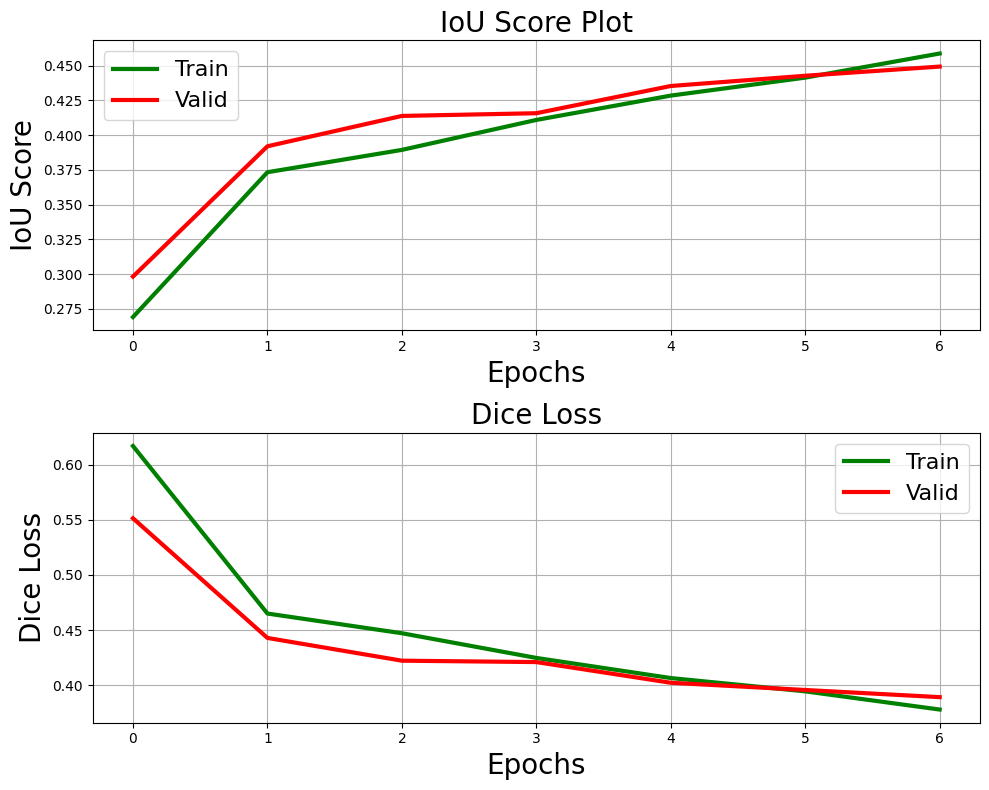

In [ ]:
import matplotlib.pyplot as plt

# Kreiranje prve slike s dva grafikona
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Prvi grafikon - IoU Score
axs[0].plot(train_logs_df.index.tolist(), train_logs_df.iou_score.tolist(), 'g-', lw=3, label='Train') # trening
axs[0].plot(valid_logs_df.index.tolist(), valid_logs_df.iou_score.tolist(), 'r-', lw=3, label='Valid') # validacija
axs[0].set_xlabel('Epochs', fontsize=20)
axs[0].set_ylabel('IoU Score', fontsize=20)
axs[0].set_title('IoU Score Plot', fontsize=20)
axs[0].legend(loc='best', fontsize=16)
axs[0].grid()

# Drugi grafikon - Dice Loss
axs[1].plot(train_logs_df.index.tolist(), train_logs_df.dice_loss.tolist(), 'g-', lw=3, label='Train')
axs[1].plot(valid_logs_df.index.tolist(), valid_logs_df.dice_loss.tolist(), 'r-', lw=3, label='Valid')
axs[1].set_xlabel('Epochs', fontsize=20)
axs[1].set_ylabel('Dice Loss', fontsize=20)
axs[1].set_title('Dice Loss', fontsize=20)
axs[1].legend(loc='best', fontsize=16)
axs[1].grid()

plt.tight_layout()  # Ovo će automatski prilagoditi raspored grafikona kako bi se izbjeglo preklapanje
plt.show()


#**Testiranje**

Testiranje modela je faza u kojoj proveravamo koliko dobro naš model funkcioniše na novim podacima koje nije video tokom treninga ili validacije. Cilj testiranja je da vidimo koliko model generalizuje, odnosno da li može da prepozna obrasce i napravi precizne predikcije na stvarnim slikama. Ovo je ključna faza jer dobar rezultat na treningu ne znači automatski da će model raditi i na nepoznatim podacima.
U segmentaciji slika, testiranje se obično radi tako što se slike iz test skupa šalju kroz trenirani model da se dobiju predikcije maski. Vizualizacija originalne slike, stvarne maske i predviđene maske pomaže da brzo vidimo gde model greši, a gde dobro segmentira.

Prikaz par slika posle trenitanja na kojima se vidi originalna slika, maska i predviđena maska.

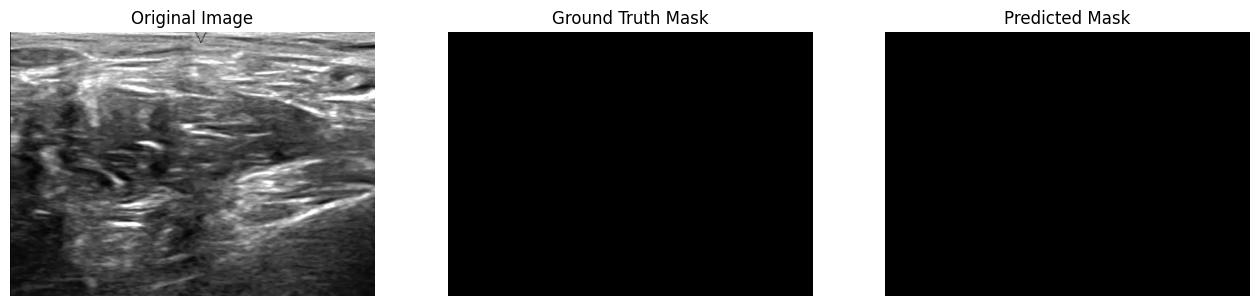

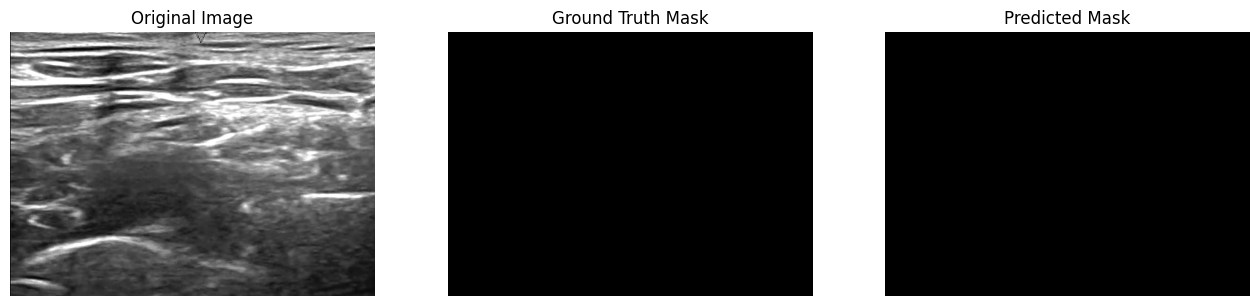

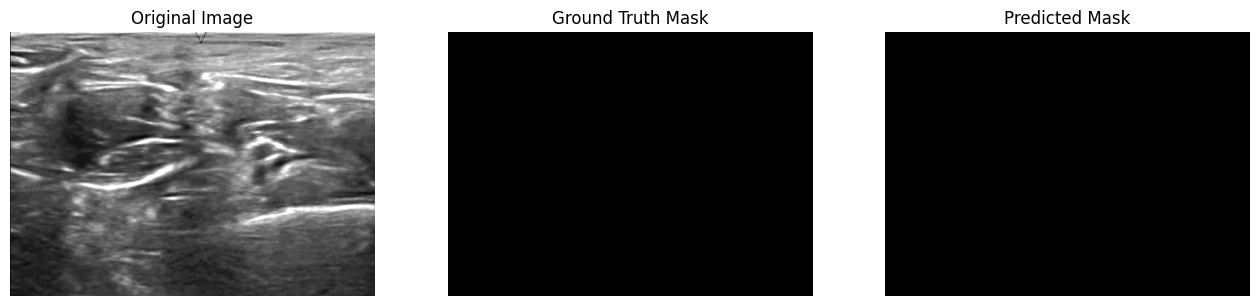

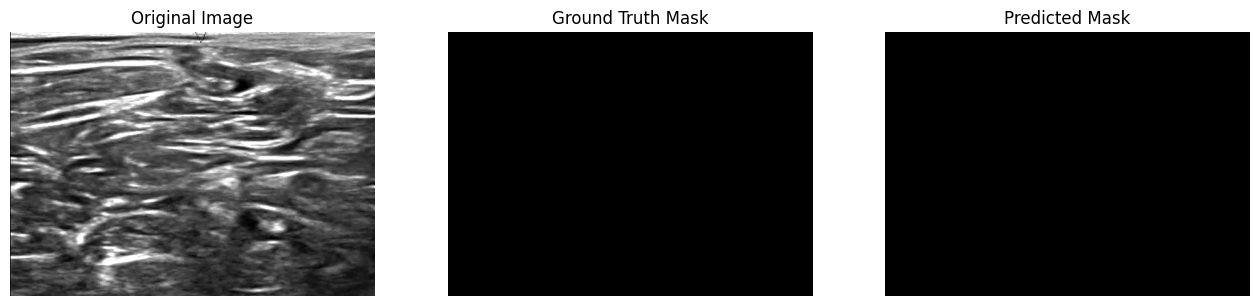

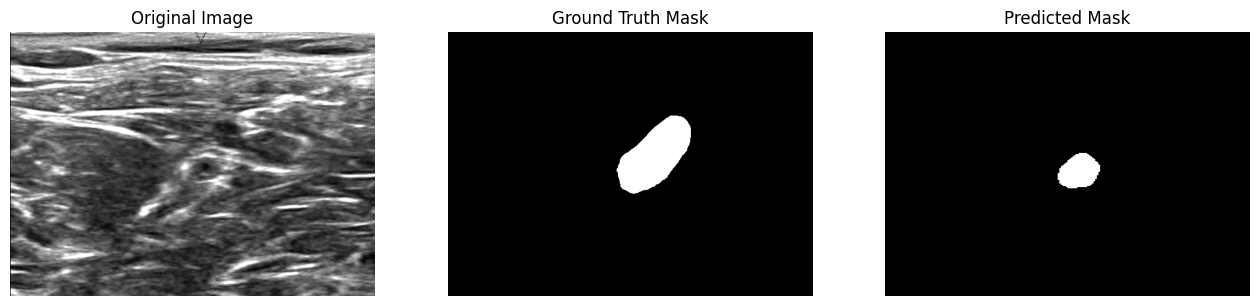

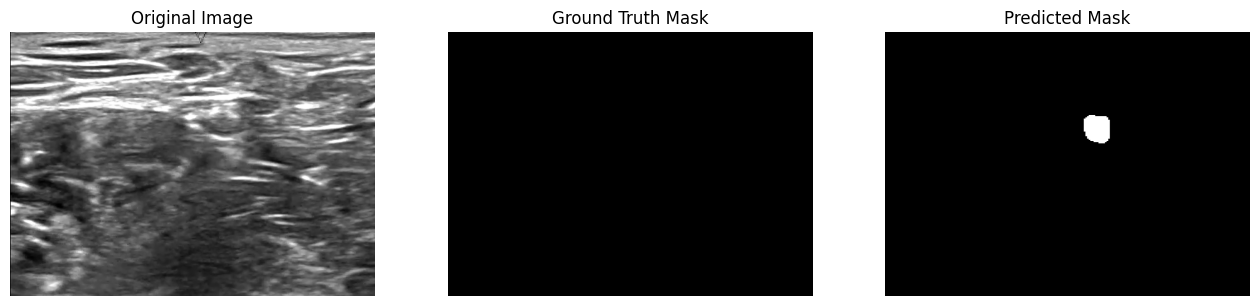

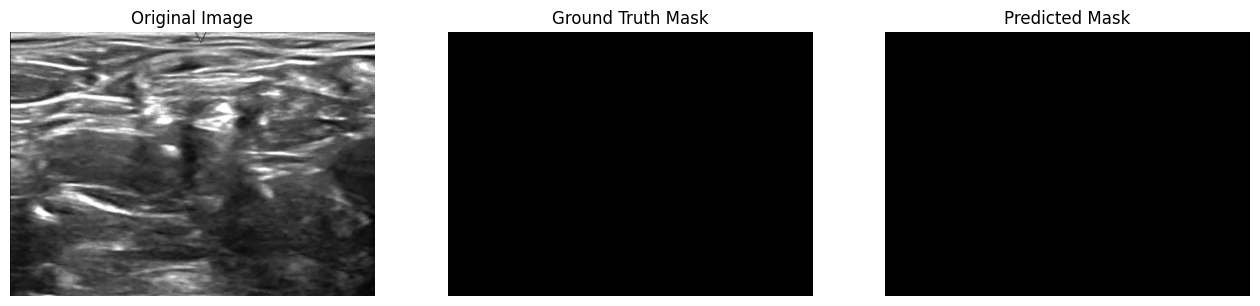

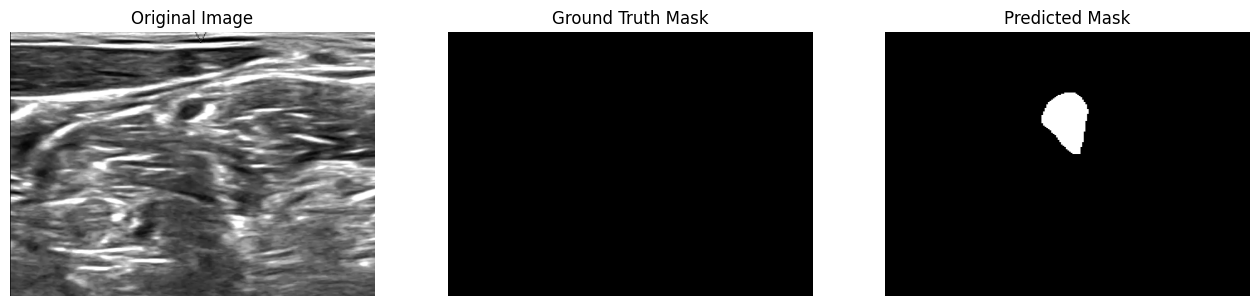

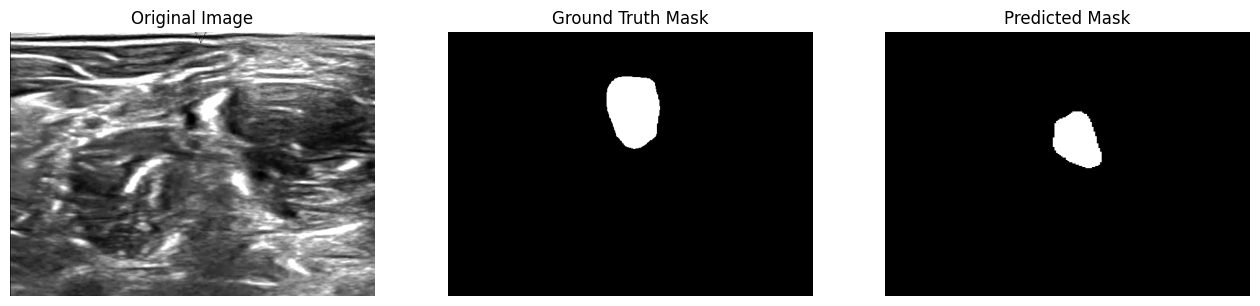

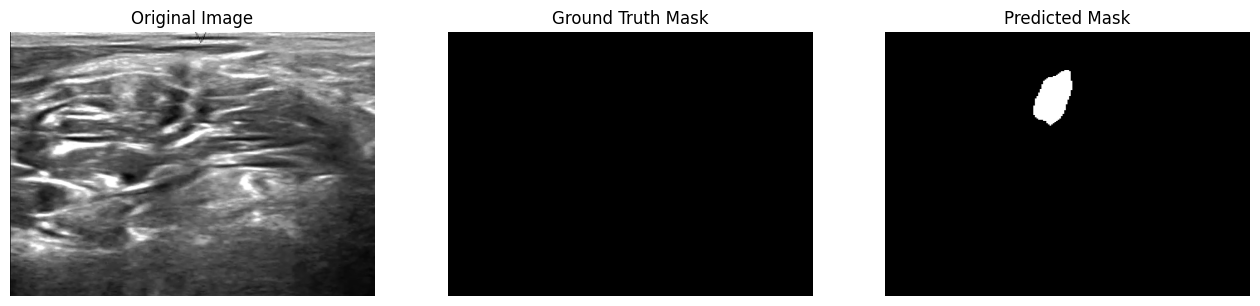

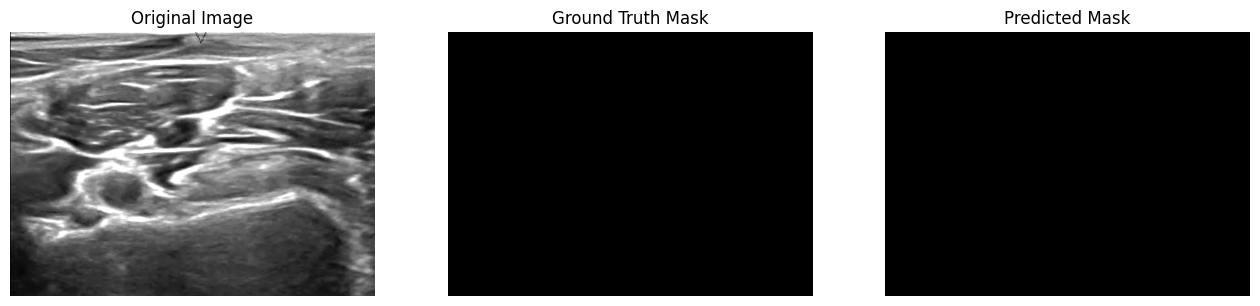

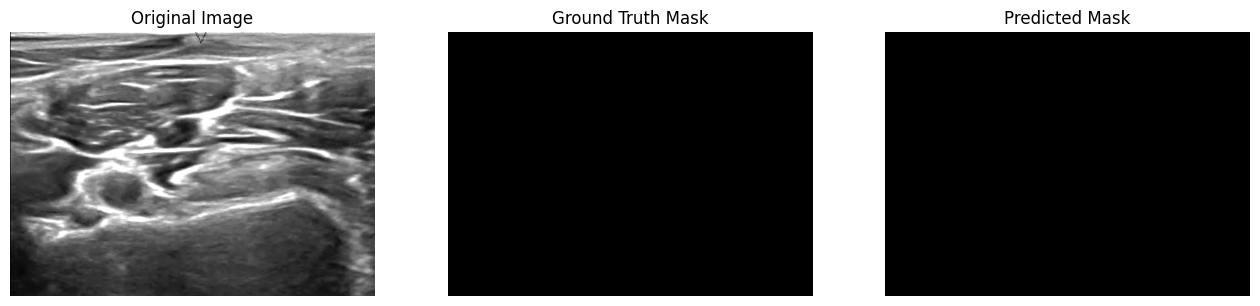

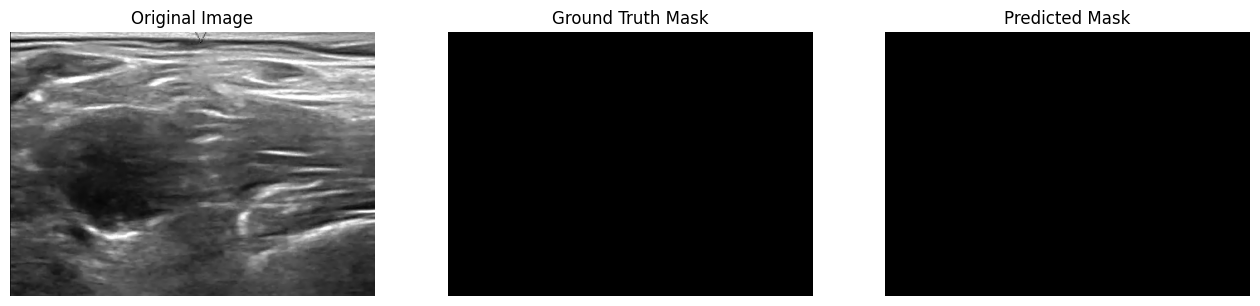

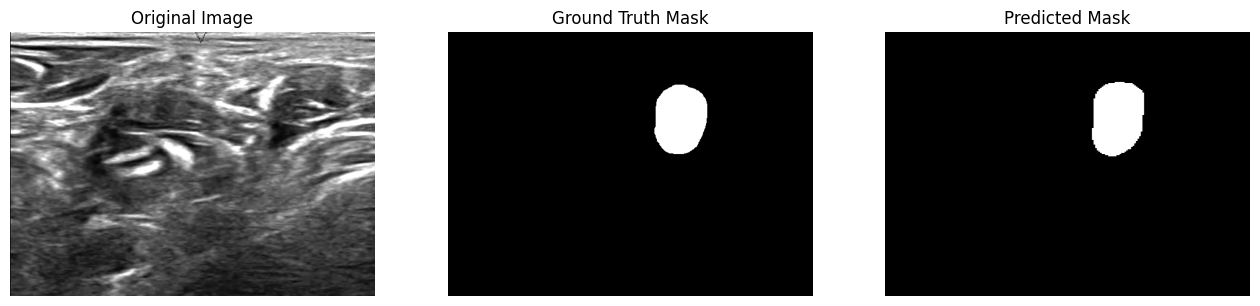

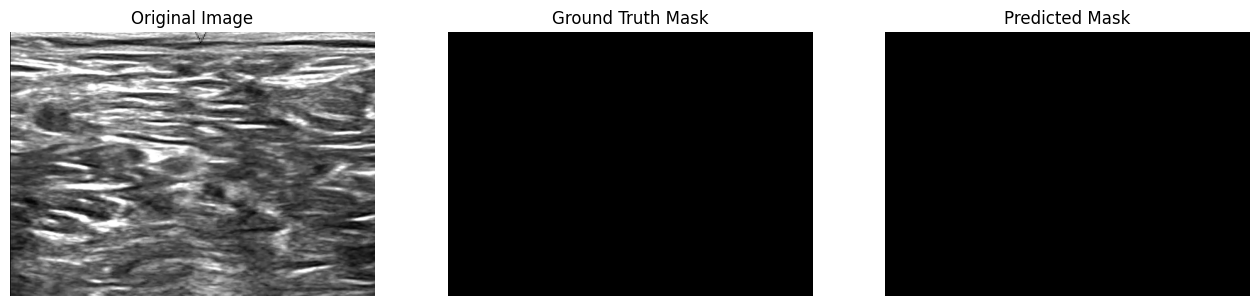

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

m_segmentation_model = torch.load('./best_model.pth')

#Učitavanje podataka da bi se mogli koristiti u funkciji za prikaz
# dataset za testiranje sa preprocesiranjem i transformacijama
test_dset = GetDataset(imagespath = validation_df['image'].tolist(),
                            maskspath = validation_df['mask'].tolist(),
                            augment = validation_aug(),
                           preprocess = preprocessing(preprocess_fn))

# dataset za vizualizaciju bez transformacija
test_dset_vis = GetDataset(imagespath = validation_df['image'].tolist(),
                            maskspath = validation_df['mask'].tolist())


 # Definisanje funkcije za prikaz slika
def visualize_images(image, ground_truth_mask, predicted_mask):
    plt.figure(figsize=(16, 5))

    # Prikaz originalne slike
    plt.subplot(1, 3, 1)
    plt.imshow(image.astype('uint8'))
    plt.title('Original Image')
    plt.axis('off')

    # Prikaz stvarne maske
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth_mask.astype('uint8'), cmap='gray', extent=(0, ground_truth_mask.shape[1], ground_truth_mask.shape[0], 0))
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Prikaz predviđene maske
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask, cmap='gray', extent=(0, ground_truth_mask.shape[1], ground_truth_mask.shape[0], 0))
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

# Testiranje modela na 15 slika
for i in range(15):
    n = np.random.choice(len(test_dset))

    # vizualizacija ulazne slike i maske
    image_vis = test_dset_vis[n][0].astype('uint8')
    mask_vis = test_dset_vis[n][1].astype('uint8')

    # učitavanje slike i ground truth maske za model
    image, gt_mask = test_dset[n]
    gt_mask = gt_mask.squeeze()

    # konverzija slike u tensor i slanje na device
    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0)

    # predikcija maske modelom
    pr_mask = m_segmentation_model.predict(x_tensor)
    pr_mask = pr_mask.squeeze().cpu().numpy().round()

    mask_vis = mask_vis.squeeze()

    # prikaz slike, ground truth i predikcije
    visualize_images(image_vis, mask_vis, pr_mask)



Pravi se submission fajl koji sadrži pretpostavke natreniranog modela. Za svaku sliku iz trening seta se prolazi i piše kolika je predikcija odnosno gde je predviđeno da se nalazi nerv.

Funkcija rle_encoding vrši RLE kodiranje binarne maske. Ova funkcija prima binarnu masku kao ulaz i vraća niz parova koji predstavljaju dužine intervala (run-length encoding) gde se nalazi nerv. Ovo je oblik kodiranja koji se često koristi u konkurencijama za segmentaciju objekata kako bi se kompaktno predstavili rezultati

Petlja ide kroz sve test slike:
* učitava sliku,

* primenjuje validacione transformacije i preprocesiranje,

* predviđa masku modelom,

* binarizuje i resize-uje masku na originalnu dimenziju,

* enkodira masku u RLE i čuva u listu encodings.

In [ ]:
import os
#Run-Length Encoding- kodiranje binarnog niza
def rle_encoding(x):
    #flatten() ili poravnanje- pretvranje u jednodimenzioni niz
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

# lista svih test slika, sortirano po broju u imenu
imgs = [f for f in os.listdir(test)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

encodings = [] # lista za RLE kodove

# predikcija i enkodiranje za svaku test sliku
for m in tqdm(imgs):
    x = cv2.imread(os.path.join(test, m))  # učitava sliku

    x = validation_aug()(image=x)['image'] # validacione transformacije
    x = preprocessing(preprocess_fn)(image=x)['image'] # preprocesiranje

    x_tensor = torch.from_numpy(x).to(device).unsqueeze(0) # konverzija u tensor i slanje na device
    pr_mask = m_segmentation_model.predict(x_tensor) # predikcija maske

    pr_mask = pr_mask.squeeze().cpu().numpy().round().astype(np.uint8) # binarizacija i konverzija u uint8
    pr_mask = albumentations.Resize(height=420,width=580,interpolation=Image.NEAREST)(image=pr_mask)['image'] # resize maske na originalnu dimenziju

    encodings.append(rle_encoding(pr_mask)) # enkodiranje maske u RLE

In [ ]:
# kreiranje praznog DataFrame-a za submission
df_submission = pd.DataFrame(columns=["img", "pixels"])

# popunjavanje DataFrame-a sa RLE kodovima
for i, encoding in enumerate(encodings):
    pixels = ' '.join(map(str, encoding)) # spaja listu u string
    df_submission.loc[i] = [str(i+1), pixels] # dodaje red u DataFrame

df_submission.to_csv('submission.csv', index=False)

#**Zaključak**

Nakon stvaranja modela i prikazivanja rešenja za problem segmentacije nerava na ultrazvučnim slikama, uočava se potencijal za poboljšanje tačnosti modela. Na parametre modela su uticali različiti faktori, uključujući ograničenje broja epoha zbog nedostatka resursa, što je rezultiralo smanjenom preciznošću prikazanog rešenja.

Na početku sam koristio klasičnu implementaciju U-Net modela u TensorFlow Kerasu ali rezultati nisu bili zadovoljavajući, tačnost je bila niža i model nije dovoljno dobro radio. Na kraju sam prešao na PyTorch i biblioteku segmentation-models-pytorch, gde sam implementirao U-Net sa ResNet34 encoderom treniranim na ImageNet-u. Ovaj pristup se pokazao značajno boljim i davao je stabilnije rezultate.

Iako postoji niz drugih faktora koji mogu uticati na kvalitet modela, važno je naglasiti da je glavni cilj ovog projekta upoznavanje s osnovnim konceptima računarske vizije, sticanje znanja o različitim tehnikama i praktično iskustvo u kreiranju modela. Iz ove perspektive, projekat ispunjava zahteve. Međutim, kada se analizira kvalitet stvorenog modela, ostaje prostor za proširenje znanja i razvoj modela koji bi sa većom preciznošću odgovorio na zadate zahteve.

**Reference**



* https://www.analyticsvidhya.com/blog/2022/10/image-segmentation-with-u-net/

* https://www.nvidia.com/en-us/glossary/pytorch/

* https://cancer-informatics.org/de/docs/ai/ultrasound_segmentation/


* https://debuggercafe.com/training-unet-from-scratch


* https://github.com/qubvel/segmentation_models.pytorch?tab=readme-ov-file




